In [1]:
from src.data import character_data
from src.util import characters, id_from_char, char_from_id, display_progress
from src.base_model import base_model

from pymongo import MongoClient
from tensorflow import keras

import numpy as np
import pickle

# The Characters

In [2]:
for character in characters:
    print(character)

CAPTAIN_FALCON
DONKEY_KONG
FOX
GAME_AND_WATCH
KIRBY
BOWSER
LINK
LUIGI
MARIO
MARTH
MEWTWO
NESS
PEACH
PIKACHU
ICE_CLIMBERS
JIGGLYPUFF
SAMUS
YOSHI
ZELDA
SHEIK
FALCO
YOUNG_LINK
DR_MARIO
ROY
PICHU
GANONDORF


# The Model

In [3]:
model = base_model()
model.summary()

Model: "SSBML-Base-Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ConvCell-1 (Sequential)      (None, None, 150)         59250     
_________________________________________________________________
ConvCell-2 (Sequential)      (None, None, 256)         577280    
_________________________________________________________________
ConvCell-3 (Sequential)      (None, None, 512)         1968640   
_________________________________________________________________
ConvCell-4 (Sequential)      (None, None, 512)         3932672   
_________________________________________________________________
global_average_pooling1d (Gl (None, 512)               0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
DenseCell-1 (Sequential)     (None, 128)          

# Testing

In [4]:
data_test = character_data(input_directory='data/character/test',
                           batch_size = 100,
                           shuffle=True,
                           repeat=True)

In [16]:
score = model.evaluate(data_test, verbose=1, steps=500)

print('\nTest score:', round(score[0], 3))
print(f'Test accuracy: {round(score[1]*100)}%')
print(f'Test test top 8 categorical accuracy: {round(score[2]*100)}%') 

500/500 [==============================] - 69s 137ms/step - loss: 0.0273 - accuracy: 0.9502 - top 8 accuracy: 0.9859

Test score: 0.027
Test accuracy: 95%
Test test top 8 categorical accuracy: 99%


# Confusion Matrix

In [17]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [18]:
def get_conf_matrix(labels_as_id, predictions_as_id):
    conf_matrix = np.zeros((27,27))
    for i_real, i_pred in zip(labels_as_id, predictions_as_id):
        conf_matrix[i_real, i_pred] += 1
    return conf_matrix

In [19]:
num_batches = 100
data_conf = character_data(input_directory='data/character/test',
                           batch_size = 100,
                           num_batches = num_batches,
                           shuffle=True,
                           onehot=False)

In [20]:
recalls = {k:0 for k in range(1,27)}
precisions = {k:0 for k in range(1,27)}

batch_preds = []
batch_labels = []
i = 0

for xi, yi in data_conf:
    batch_preds.append(np.argmax(model.predict(xi), axis=1))
    batch_labels.append(yi)
    
    i+=1
    display_progress(i, num_batches)
display_progress(num_batches, num_batches)
    
pred = np.concatenate(batch_preds)
labels = np.concatenate(batch_labels)

conf_matrix = get_conf_matrix(labels, pred)
conf_df = pd.DataFrame(conf_matrix[1:,1:], index=characters, columns=characters)

[####################] 100 of 100 - 100.0% 

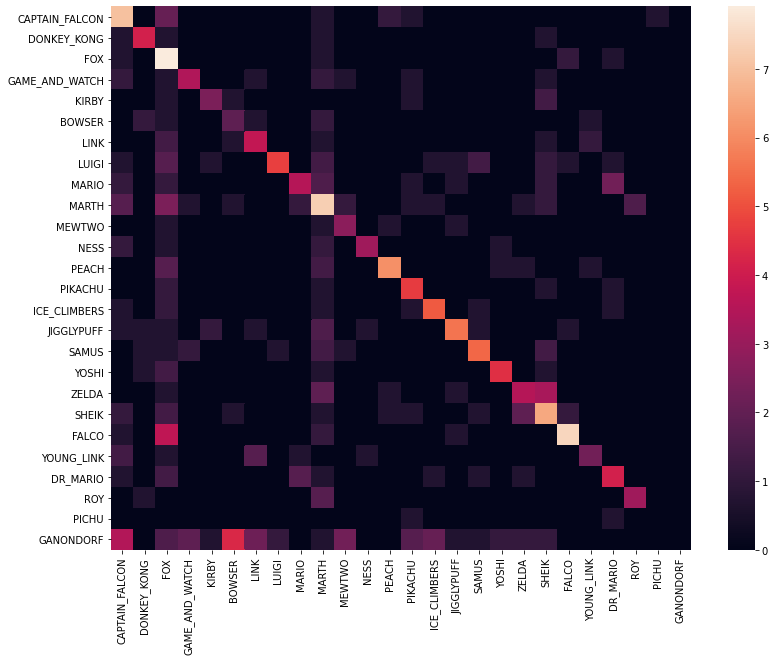

In [27]:
# sn.heatmap(conf_df, annot=False, mask=conf_df <= 0, cmap='viridis')
fig, ax = plt.subplots(figsize=(13,10))
fig.patch.set_facecolor('white')
sn.heatmap(np.log(1 + conf_df), annot=False, ax=ax, square=False)
fig.savefig('images/SSBML-Base-Model.png')

# Training

In [6]:
# Define Data generation
data_train = character_data(input_directory='data/character/train',
                            batch_size = 32,
                            shuffle=True,
                            repeat=True)

In [7]:
# Training Loop
model.fit(data_train,
          epochs=20,
          steps_per_epoch=2048,
          verbose=1)

score = model.evaluate(data_test, steps=50, verbose=0)
print('\nTest score:', round(score[0], 3))
print(f'Test accuracy: {round(score[1]*100)}%')
print(f'Test test top 8 accuracy: {round(score[2]*100)}%')

Epoch 1/20
2048/2048 [==============================] - 507s 248ms/step - loss: 0.2187 - accuracy: 0.6974 - top 8 accuracy: 0.9310
Epoch 2/20
2048/2048 [==============================] - 502s 245ms/step - loss: 0.1052 - accuracy: 0.8474 - top 8 accuracy: 0.9663
Epoch 3/20
2048/2048 [==============================] - 499s 244ms/step - loss: 0.0817 - accuracy: 0.8776 - top 8 accuracy: 0.9709
Epoch 4/20
2048/2048 [==============================] - 504s 246ms/step - loss: 0.0710 - accuracy: 0.8930 - top 8 accuracy: 0.9743
Epoch 5/20
2048/2048 [==============================] - 505s 246ms/step - loss: 0.0634 - accuracy: 0.9021 - top 8 accuracy: 0.9766
Epoch 6/20
2048/2048 [==============================] - 504s 246ms/step - loss: 0.0597 - accuracy: 0.9059 - top 8 accuracy: 0.9756
Epoch 7/20
2048/2048 [==============================] - 503s 246ms/step - loss: 0.0562 - accuracy: 0.9106 - top 8 accuracy: 0.9767
Epoch 8/20
2048/2048 [==============================] - 501s 245ms/step - loss: 0.0

In [8]:
# Define Data generation
data_train = character_data(input_directory='data/character/train',
                            batch_size = 128,
                            shuffle=True,
                            repeat=True)

In [9]:
# Training Loop
model.fit(data_train,
          epochs=15,
          steps_per_epoch=512,
          verbose=1)

score = model.evaluate(data_test, steps=50, verbose=0)
print('\nTest score:', round(score[0], 3))
print(f'Test accuracy: {round(score[1]*100)}%')
print(f'Test test top 8 accuracy: {round(score[2]*100)}%')

Epoch 1/15
512/512 [==============================] - 522s 1s/step - loss: 0.0313 - accuracy: 0.9437 - top 8 accuracy: 0.9811
Epoch 2/15
512/512 [==============================] - 516s 1s/step - loss: 0.0296 - accuracy: 0.9462 - top 8 accuracy: 0.9835
Epoch 3/15
512/512 [==============================] - 513s 1s/step - loss: 0.0289 - accuracy: 0.9463 - top 8 accuracy: 0.9826
Epoch 4/15
512/512 [==============================] - 513s 1s/step - loss: 0.0289 - accuracy: 0.9472 - top 8 accuracy: 0.9821
Epoch 5/15
512/512 [==============================] - 513s 1s/step - loss: 0.0290 - accuracy: 0.9466 - top 8 accuracy: 0.9826
Epoch 6/15
512/512 [==============================] - 514s 1s/step - loss: 0.0271 - accuracy: 0.9494 - top 8 accuracy: 0.9828
Epoch 7/15
512/512 [==============================] - 513s 1s/step - loss: 0.0276 - accuracy: 0.9485 - top 8 accuracy: 0.9837
Epoch 8/15
512/512 [==============================] - 512s 1s/step - loss: 0.0270 - accuracy: 0.9482 - top 8 accuracy:

In [10]:
# Define Data generation
data_train = character_data(input_directory='data/character/train',
                            batch_size = 512,
                            shuffle=True,
                            repeat=True)

In [11]:
# Training Loop
model.fit(data_train,
          epochs=10,
          steps_per_epoch=128,
          verbose=1)

score = model.evaluate(data_test, steps=50, verbose=0)
print('\nTest score:', round(score[0], 3))
print(f'Test accuracy: {round(score[1]*100)}%')
print(f'Test test top 8 accuracy: {round(score[2]*100)}%')

Epoch 1/10
128/128 [==============================] - 530s 4s/step - loss: 0.0211 - accuracy: 0.9572 - top 8 accuracy: 0.9843
Epoch 2/10
128/128 [==============================] - 529s 4s/step - loss: 0.0204 - accuracy: 0.9583 - top 8 accuracy: 0.9856
Epoch 3/10
128/128 [==============================] - 529s 4s/step - loss: 0.0201 - accuracy: 0.9580 - top 8 accuracy: 0.9849
Epoch 4/10
128/128 [==============================] - 529s 4s/step - loss: 0.0200 - accuracy: 0.9576 - top 8 accuracy: 0.9854
Epoch 5/10
128/128 [==============================] - 526s 4s/step - loss: 0.0199 - accuracy: 0.9597 - top 8 accuracy: 0.9851
Epoch 6/10
128/128 [==============================] - 527s 4s/step - loss: 0.0205 - accuracy: 0.9575 - top 8 accuracy: 0.9848
Epoch 7/10
128/128 [==============================] - 526s 4s/step - loss: 0.0201 - accuracy: 0.9582 - top 8 accuracy: 0.9855
Epoch 8/10
128/128 [==============================] - 526s 4s/step - loss: 0.0192 - accuracy: 0.9597 - top 8 accuracy:

In [12]:
# Define Data generation
data_train = character_data(input_directory='data/character/train',
                            batch_size = 2048,
                            shuffle=True,
                            repeat=True)

In [13]:
# Training Loop
model.fit(data_train,
          epochs=5,
          steps_per_epoch=32,
          verbose=1)

score = model.evaluate(data_test, steps=50, verbose=0)
print('\nTest score:', round(score[0], 3))
print(f'Test accuracy: {round(score[1]*100)}%')
print(f'Test test top 8 accuracy: {round(score[2]*100)}%')

Epoch 1/5
32/32 [==============================] - 518s 16s/step - loss: 0.0160 - accuracy: 0.9647 - top 8 accuracy: 0.9869
Epoch 2/5
32/32 [==============================] - 518s 16s/step - loss: 0.0153 - accuracy: 0.9653 - top 8 accuracy: 0.9864
Epoch 3/5
32/32 [==============================] - 516s 16s/step - loss: 0.0159 - accuracy: 0.9646 - top 8 accuracy: 0.9863
Epoch 4/5
32/32 [==============================] - 519s 16s/step - loss: 0.0161 - accuracy: 0.9641 - top 8 accuracy: 0.9861
Epoch 5/5
32/32 [==============================] - 514s 16s/step - loss: 0.0159 - accuracy: 0.9644 - top 8 accuracy: 0.9861

Test score: 0.027
Test accuracy: 95%
Test test top 8 accuracy: 99%


In [14]:
score = model.evaluate(data_test, steps=500, verbose=0)
print('\nTest score:', round(score[0], 3))
print(f'Test accuracy: {round(score[1]*100)}%')
print(f'Test test top 8 accuracy: {round(score[2]*100)}%')


Test score: 0.026
Test accuracy: 95%
Test test top 8 accuracy: 99%


In [15]:
model.save('models/SSBML-Base-Model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
